In [1]:
url = ('https://raw.githubusercontent.com/jakevdp/''bicycle-data/main/FremontBridge.csv')
!curl -O {url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: raw.githubusercontent.com


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)

/tmp/ipykernel_7998/3301310143.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)


In [ ]:
data.head()

In [ ]:
# Let's shorten column names for convenience 
data.columns = ['Total', 'East', 'West']

# describe data
data.dropna().describe()

### Visualizing the Data

In [ ]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

In [ ]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicycle count');

In [ ]:
#Sum Hours by the day
daily = data.resample('D').sum()
#roll through days 
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'])

# Idk why:
plt.ylabel('mean hourly count');

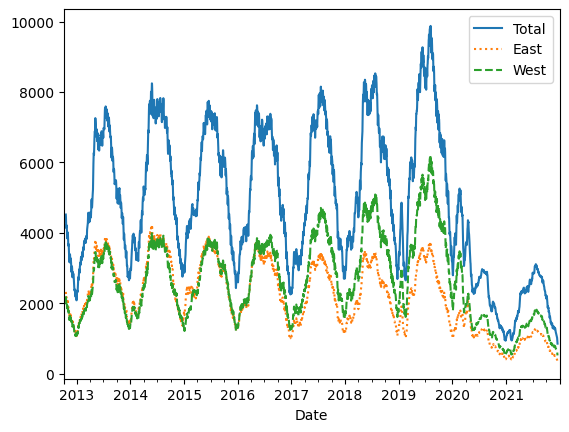

In [27]:
view = data.resample('D').sum()
view = (view.rolling(30, center=True).mean()).plot(style=['-', ':', '--']);

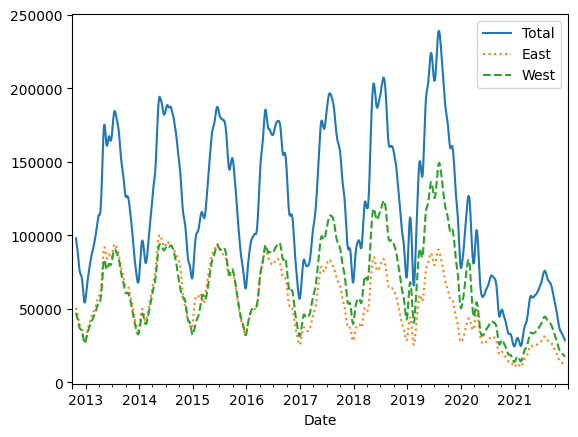

In [28]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=['-', ':', '--']);